# General Information

Please use the following picture for all tasks in this notebook. You are allowed to use OpenCV to solve the tasks.

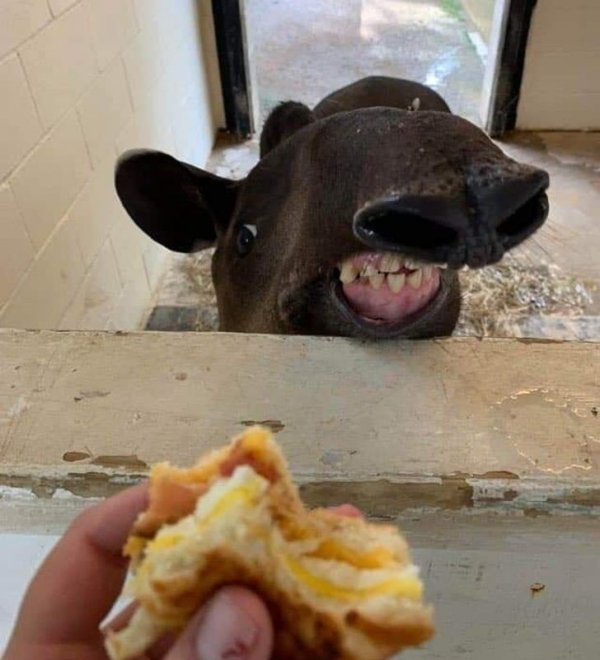

In [2]:
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.colors as colors
import cv2

# Load the picture in greyscale

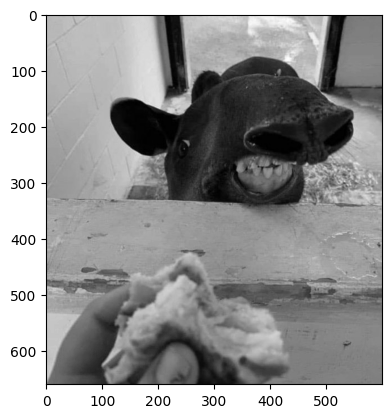

In [5]:
img = cv2.imread(r"C:\Users\nessl\OneDrive\Desktop\Studium\Semester 4\Bildverstehen\Praktikum\Praktikum 3\food.JPG", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='grey')

# Blurring


## Use <code>numpy</code> to create a Box Blur filter with different dimensions (5,11,21) and apply it to the test image
**Hint**: Take care for the correct normalization constant

In [77]:
def blur_filter(img, filter_sizes):
    num_filters = len(filter_sizes)
    fig, axs = plt.subplots(1, num_filters, figsize=(20, 5))
    
    for idx, d in enumerate(filter_sizes):
        blur_filter = np.ones((d, d)) / (d * d)
        blurred_img = cv2.filter2D(img, -1, blur_filter)
        
        axs[idx].imshow(blurred_img, cmap='gray')
        axs[idx].set_title(f'Filter size: {d}')
        axs[idx].axis('off')
    
    plt.show()


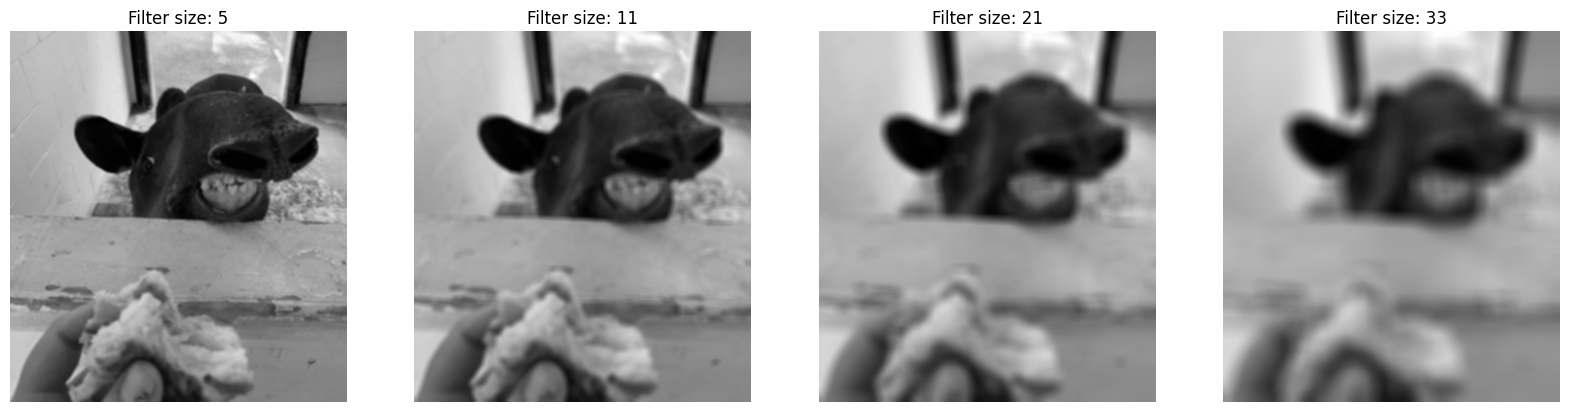

In [78]:
blur_filter(img, [5, 11, 21, 33])

## Use <code>cv2</code> to create a Gaussian Blur with different kernel sizes (5,11,21) and apply it to the image. Study the effect of the kernel size and compare it to the Box Blur

In [75]:
def gausian_filter(img, filter_sizes):
    num_filters = len(filter_sizes)
    fig, axs = plt.subplots(1, num_filters, figsize=(20, 5))
    
    for idx, d in enumerate(filter_sizes):
        axs[idx].imshow(cv2.GaussianBlur(img, (d, d), 0), cmap='gray')
        axs[idx].set_title(f'Filter size: {d}')
        axs[idx].axis('off')
    
    plt.show()

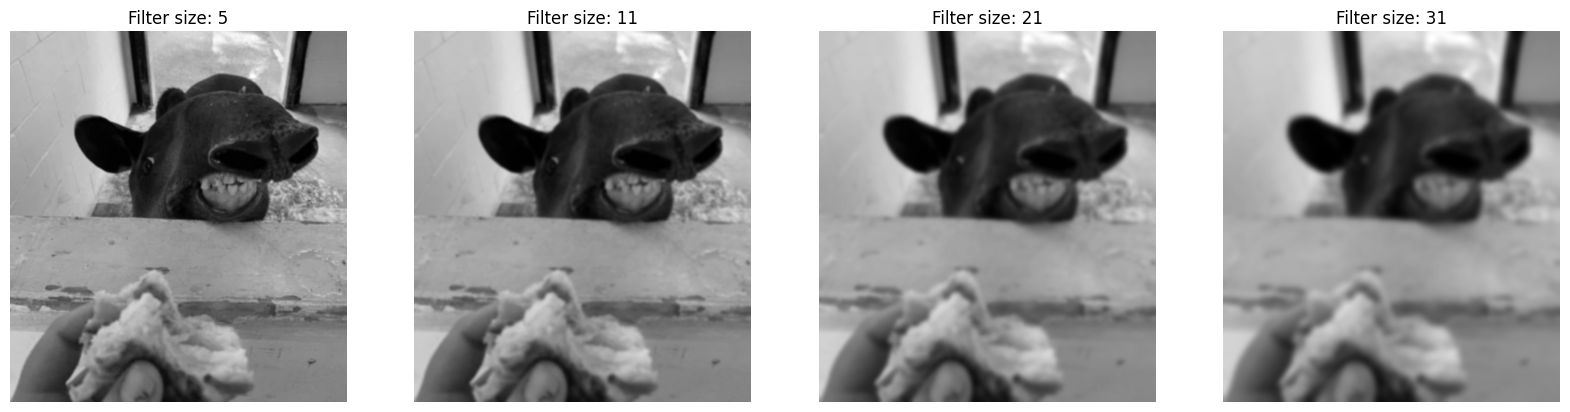

In [76]:
gausian_filter(img, [5,11,21, 31])

# Sharpen

## Use <code>numpy</code> to define a kernel that can sharpen your image and apply it

In [69]:
def sharpened_filter(img, filter_sizes):
    num_filters = len(filter_sizes)
    fig, axs = plt.subplots(1, num_filters, figsize=(25, 10))
    
    for idx, d in enumerate(filter_sizes):
        sharpening_kernel = np.full((3, 3), -1)
        sharpening_kernel[1, 1] = d
        sharpened_img = cv2.filter2D(img, -1, sharpening_kernel)
        axs[idx].imshow(sharpened_img, cmap='gray')
        axs[idx].set_title(f'Filter size: {d}')
        axs[idx].axis('off')

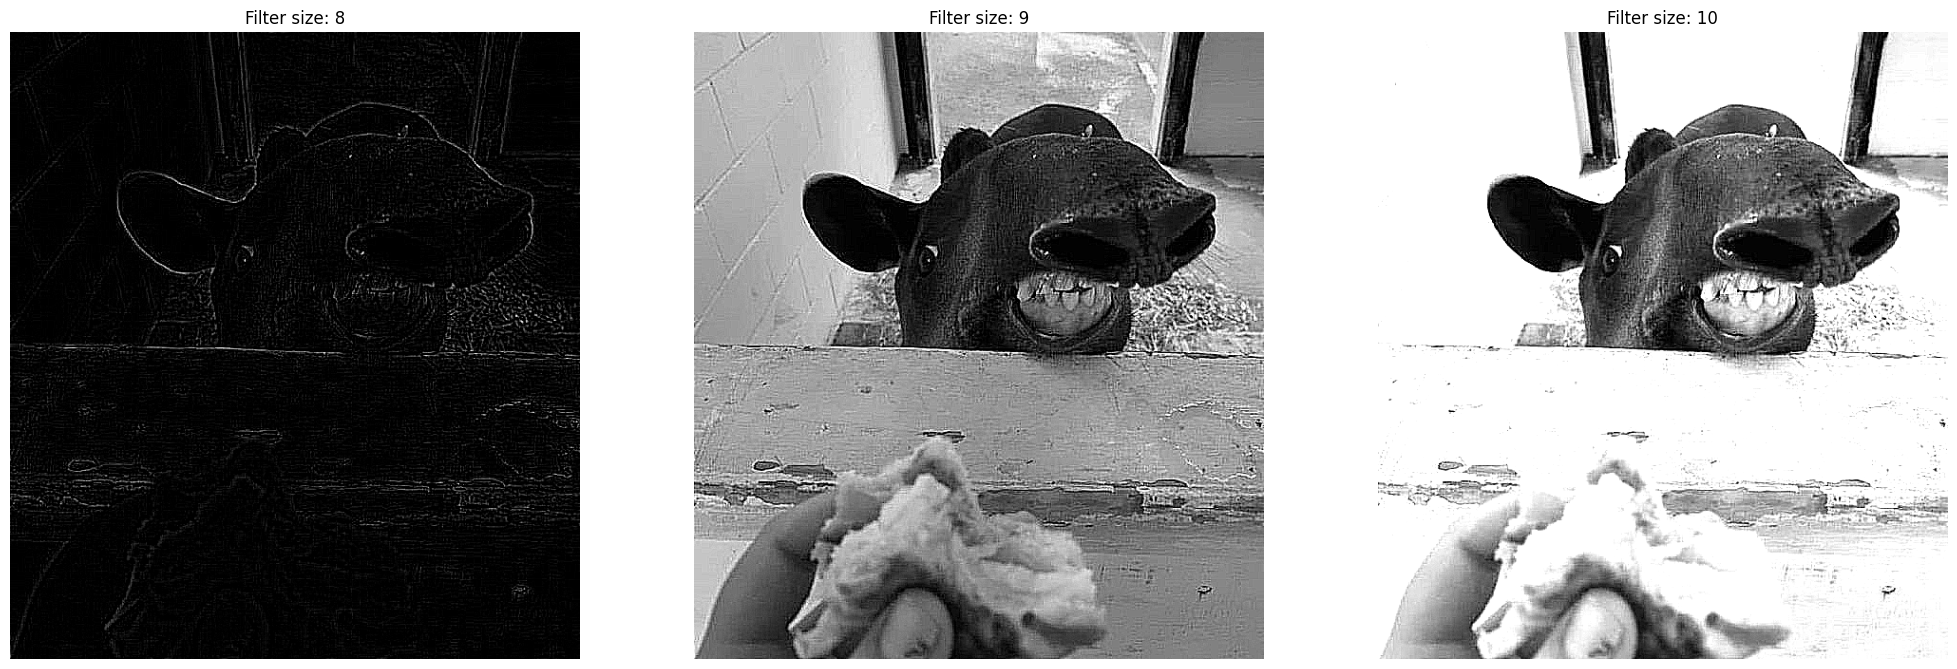

In [74]:
sharpened_filter(img, [8,9,10])

# Edge Detection

## Define a kernel that can detect edges and apply it to the image. Visualize the resulting image

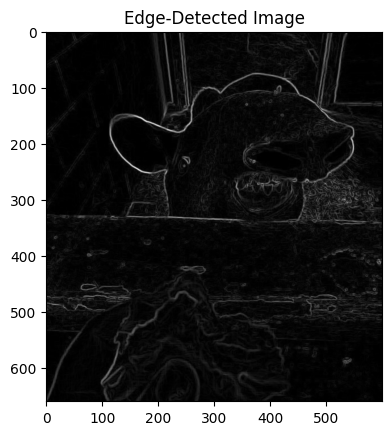

In [79]:
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

sobel_combined = cv2.sqrt(sobel_x**2 + sobel_y**2)
sobel_combined = cv2.normalize(sobel_combined, None, 0, 255, cv2.NORM_MINMAX)
sobel_combined = sobel_combined.astype(np.uint8)

plt.imshow(sobel_combined, cmap='gray')
plt.title('Edge-Detected Image')
plt.show()

## Use a sobel filter (see in lecture slides) and apply it to the image in x and in y direction.

(-0.5, 599.5, 659.5, -0.5)

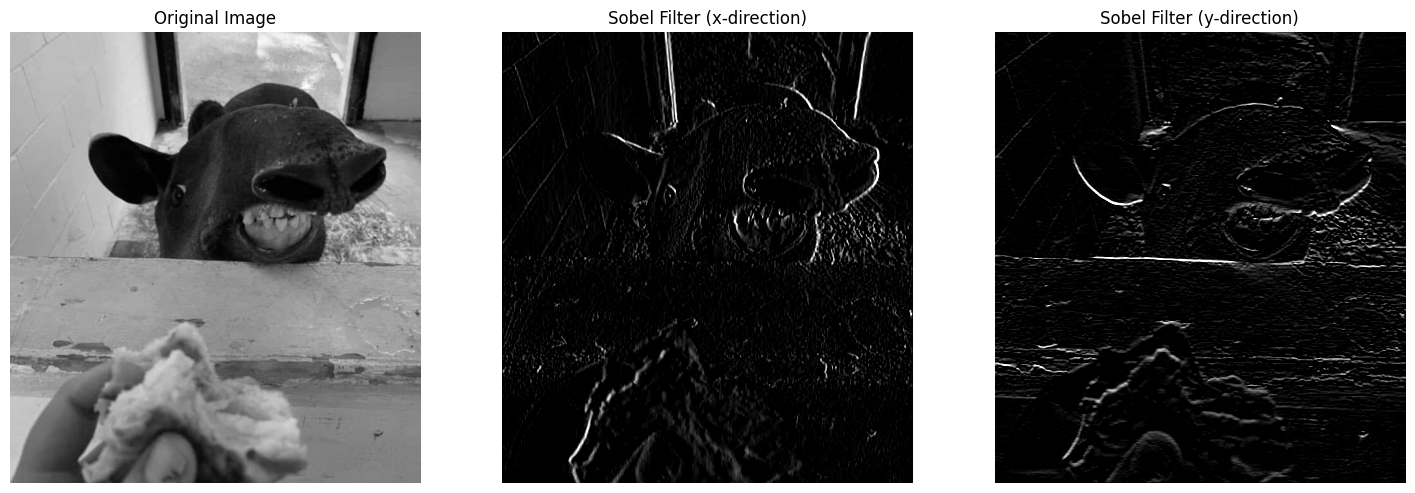

In [88]:
plt.figure(figsize=(18, 12))
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray', vmax=255, vmin=0)
plt.title('Original Image')
plt.axis('off')

# Plot the Sobel filter result in the x-direction
plt.subplot(1, 3, 2)
plt.imshow(sobel_x, cmap='grey', vmax=255, vmin=0)
plt.title('Sobel Filter (x-direction)')
plt.axis('off')

# Plot the Sobel filter result in the y-direction
plt.subplot(1, 3, 3)
plt.imshow(sobel_y, cmap='grey', vmax=255, vmin=0)
plt.title('Sobel Filter (y-direction)')
plt.axis('off')

## Calculate the magnitude and orientation and visualize it
$ H_{magnitude} = \sqrt{H_x^2 + H_y^2} $

$\theta = arctan(H_x,H_y)$

In [191]:
# Hint: to visualize orientation, use HSV color space!